# Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris


In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

The following cell shows the program training a decision tree and its results in preciction

In [6]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)


[0.96666667 1.         0.86666667 0.86666667 1.        ]


The following cell shows the training of k-nearest neighbors and its prediction results.
Here we use a uniform weighting setting (weights='uniform'): any neighbors weights the same in the majority voting aggregation.

In [7]:
from sklearn import neighbors
n_neighbors = 11
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf_knn = clf_knn.fit(iris.data, iris.target)
scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)
# shows the model predictions
# for i in range(len(iris.target)):
#     print(iris.data[i,:])
#     print(iris.data[i,:].reshape(1,-1))
#     instance=iris.data[i,:].reshape(1,-1)
#     #print(clf_knn.predict(instance))
#     predicted=clf_knn.predict(instance)[0]
#     print(predicted)
#     if iris.target[i]==predicted:
#         print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
#     else:
#         print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))

[0.93333333 1.         1.         0.96666667 1.        ]


In the following cell we use a varying weighting setting (weights='distance'): any neighbors weights inversely with its distance to the test instance in the majority voting aggregation.

The following cell shows the tuning of the k-nn models with a varying value of k (number of nearest neighbors) and finds the best value of k (giving the maximum accuracy).

k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.9166666666666666
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9166666666666666
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9333333333333333
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.9666666666666667
k neighbors=13
accuracy=0.9666666666666667
k neighbors=14
accuracy=0.95
k neighbors=15
accuracy=0.95
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9166666666666666
k neighbors=19
accuracy=0.9166666666666666
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9166666666666666
k neighbors=22
accuracy=0.9166666666666666
k neighbors=23
accuracy=0.9166666666666666
k neighbors=24
accuracy=0.9
k neighbors=25
accuracy=0.91666666

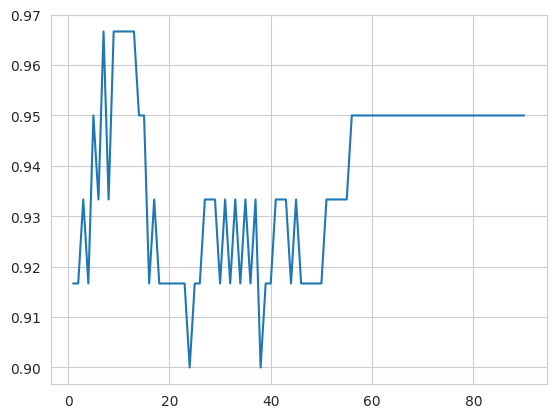

In [8]:
import numpy as np
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

best_accuracy=0
best_k=1
A=np.zeros(len(y_train), dtype=float) # for storing accuracies
for n_neighbors in np.arange(1,len(y_train)+1):
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
    clf_knn3.fit(X_train, y_train)
    index=n_neighbors-1
    A[index]=clf_knn3.score(X_test, y_test)
    if best_accuracy<clf_knn3.score(X_test, y_test):
        best_accuracy=clf_knn3.score(X_test, y_test)
        best_k=n_neighbors
    print("k neighbors="+str(n_neighbors))
    print("accuracy="+str(clf_knn3.score(X_test, y_test)))

print("\n")
print("best k="+str(best_k))
print("best accuracy="+str(best_accuracy))

import matplotlib.pyplot as plt

# plt.xticks(np.arange(1, len(y_train)+1, 8))
plt.yticks(np.arange(0.0,1.0,0.01))

plt.plot(np.arange(1,len(y_train)+1),A)

plt.show()

In the following cell we plot in the same plot two subplots with the diagrams on accuracy with the two kinds of weighting
of the vote of the neighbours (uniform and with distance)

weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333
k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k n

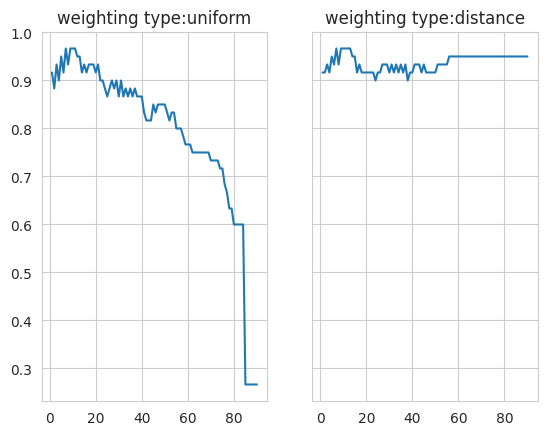

In [9]:
import numpy as np
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

i=0  #parameter in the control of the subplot to draw on'
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True)
for weight_type in ['uniform','distance']:
    print("weighting:"+str(weight_type))
    A=np.zeros(len(y_train), dtype=float) # for storing accuracies
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1
        A[index]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))

    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    if i==0:
        ax1.plot(np.arange(1,len(y_train)+1),A)
        ax1.set_title('weighting type:'+str(weight_type))
    else:
        ax2.plot(np.arange(1,len(y_train)+1),A)
        ax2.set_title('weighting type:'+str(weight_type))
    i=i+1

plt.show()


In the following cell we plot (overlapping) in the same picture both the diagrams on accuracy with the two kinds of weighting
of the vote of the neighbours (uniform and with distance)


 weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333
k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k

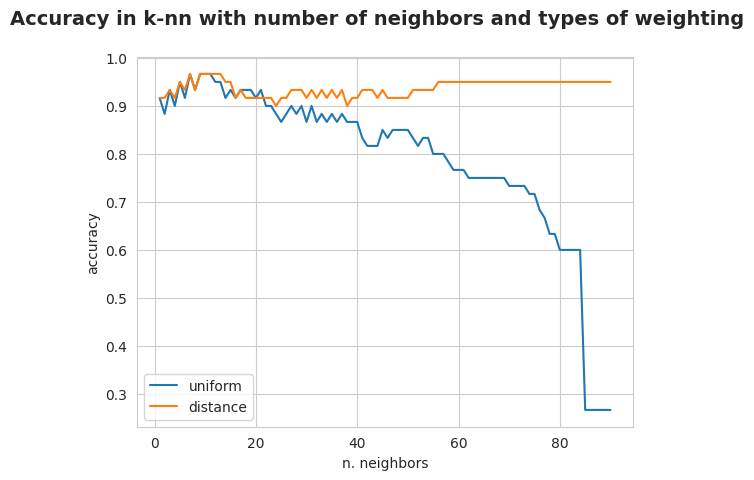

In [10]:
import numpy as np
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

fig = plt.figure()
fig.suptitle('Accuracy in k-nn with number of neighbors and types of weighting', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('n. neighbors')
ax.set_ylabel('accuracy')

A=np.zeros((len(y_train),2), dtype=float) # 2 arrays for storing accuracies for each type of weigthing
i=0  #parameter in the control of the different diagram (=matrix A column index)
best_accuracy=0
for weight_type in ['uniform','distance']:
    print("\n weighting:"+str(weight_type))
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1 # computes the matrix row index
        A[index,i]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))

    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    plt.plot(np.arange(1,len(y_train)+1),A[:,i])
    i=i+1
plt.legend(['uniform', 'distance'], loc='lower left')
plt.show()


## What you have to do:
1. Plot the Iris dataset, in 2-D, with the color as above determined by the k-nn estimation.
You have to choose the 2 input features from the original four. Which ones are  best to choose so that the classes are separated in the representation space and better distinguishable?


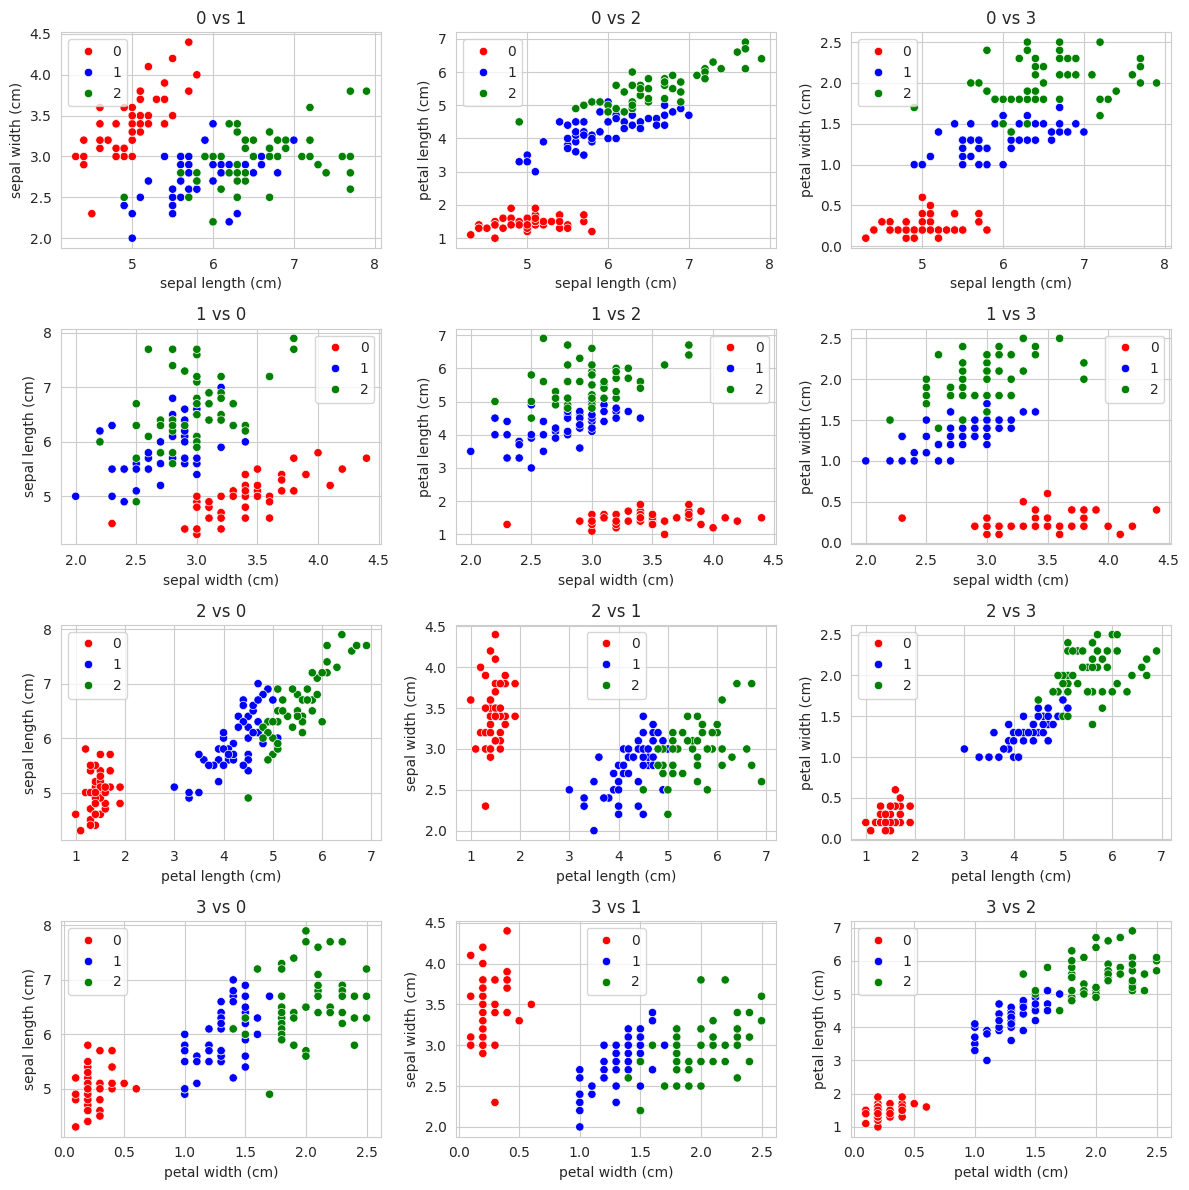

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

colors = {0: 'red', 1: 'blue', 2: 'green'}

# Create a 3x3 grid of subplots
plt.figure(figsize=(12, 12))

i = 0
for A in range(4):
    for B in range(4):
        if A != B:
            plt.subplot(4, 3, i + 1)
            sns.scatterplot(
                data=data,
                x=data.columns[A],
                y=data.columns[B],
                hue=iris.target,
                palette=colors
            )
            plt.title(f'{A} vs {B}')
            i += 1

plt.tight_layout()
plt.show()


Migliore è 2 vs 3

2. Plot the ROC plot of the k-nn (for the best value of k) for each of the three classes: setosa, virginica and versicolor


In [5]:
converter = lambda vector, positive_class: list(map(lambda x: 0 if x == positive_class else 1, vector))

def plot_roc_curve(predicted, actual):
    first_class_0_predicted = converter(predicted,0)
    first_class_1_predicted = converter(predicted,1)
    first_class_2_predicted = converter(predicted,2)

    first_class_0_test = converter(actual,0)
    first_class_1_test = converter(actual,1)
    first_class_2_test = converter(actual,2)

    # Calcolo della ROC curve
    fpr0, tpr0, th0 = roc_curve(first_class_0_test, first_class_0_predicted)
    fpr1, tpr1, th1 = roc_curve(first_class_1_test, first_class_1_predicted)
    fpr2, tpr2, th2 = roc_curve(first_class_2_test, first_class_2_predicted)

    #AUC
    roc_auc_0 = auc(fpr0, tpr0)
    roc_auc_1 = auc(fpr1, tpr1)
    roc_auc_2 = auc(fpr2, tpr2)

    # Tracciamento della ROC curve
    plt.figure(figsize=(9, 5))
    plt.plot(fpr0, tpr0, color='blue', lw=2, label=f'ROC curve 0 (area = {roc_auc_0:.2f})')
    plt.plot(fpr1, tpr1, color='red', lw=2, label=f'ROC curve 1 (area = {roc_auc_1:.2f})')
    plt.plot(fpr2, tpr2, color='orange', lw=2, label=f'ROC curve 2 (area = {roc_auc_2:.2f})')


    plt.plot([0, 0, 1], [0, 1, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


<Figure size 1200x300 with 0 Axes>

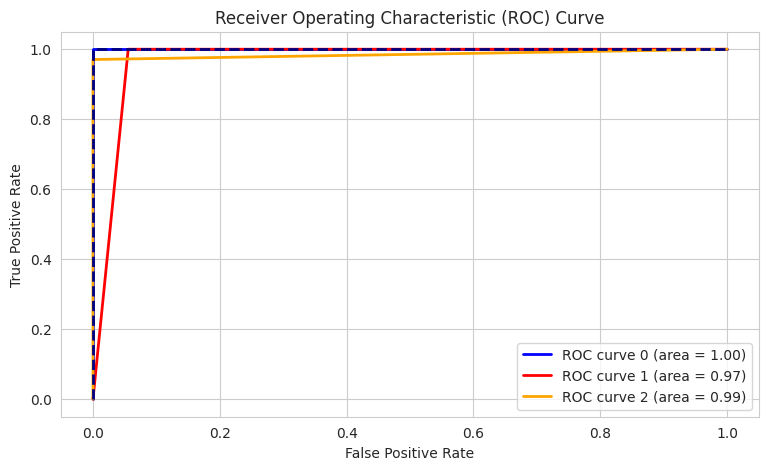

In [15]:
from sklearn.metrics import auc

plt.figure(figsize = (12,3))
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)
clf_knn = neighbors.KNeighborsClassifier(7, weights='uniform')
clf_knn = clf_knn.fit(X_train, y_train)

y_pred = clf_knn.predict(X_test)

plot_roc_curve(y_pred, y_test)

3. Plot the ROC plot for the best decision tree you trained in Exercize n.1  

<Figure size 1200x300 with 0 Axes>

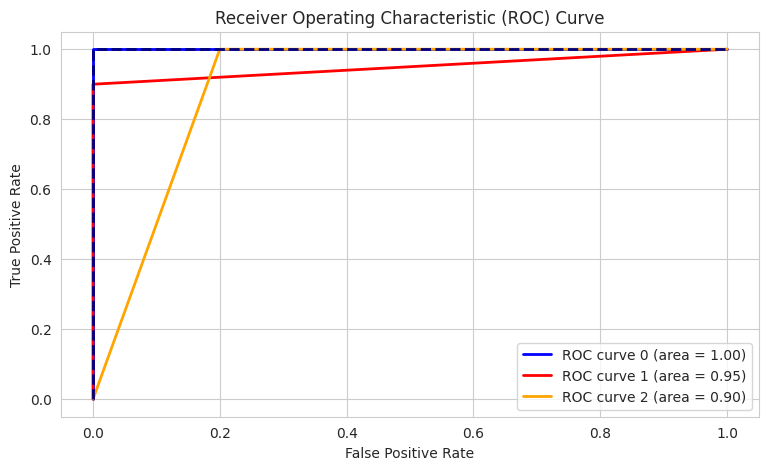

In [16]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0, stratify=iris.target)

clf_boosted = DecisionTreeClassifier(class_weight={0: 1, 1: 1, 2: 1}, criterion= 'gini', max_depth=2, min_impurity_decrease= 0.1, min_samples_leaf= 1)
clf_boosted = clf_boosted.fit(X_train, y_train)
y_pred = clf_boosted.predict(X_test)

plt.figure(figsize = (12,3))

plot_roc_curve(y_pred, y_test)

4. Compare decision trees and k-nn on the ROC space: for which values of (TPR,FPR) k-nn is better than decision trees?
Per le classi 1 e 2 come classe "One", abbiamo che per la soglia '>=1' i punti di k-nn sono migliori di quelli del decision tree.  

5. In the following, extend the above exercize on k-nn using a kernel function K(x,y) for the distances computation, such that distance(x,y)=1-K(x,y).    Use a Gaussian-like (or Radial Basis Function) kernel K(x,y)=exp(-gamma(x-y)^2), with gamma the inverse of the sigma squared variance, that must be tuned to the best value according to the accuracy reached by the k-nn, with k=7 (similarly as done with the previous example on tuning the parameter n_neightbors).

In [22]:
from sklearn.neighbors import KNeighborsClassifier
import math
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

# plt.figure(figsize = (30,30))
inf = 0
sup = 0.4
passo = 0.01
eps = 1e-14

best_accuracy=0
best_sigma = -np.inf
A=np.zeros(len(np.arange(inf,sup,passo)), dtype=float) # for storing accuracies
index = 0

values_list = []
distance_metric_list = []
for sigma in np.arange(inf,sup,passo):
    #COSTRUZIONE KERNEL
    if np.abs(sigma) < eps:
        index += 1
        continue
    gamma = 1/sigma
    kernel = lambda x,y: math.exp(- gamma * np.linalg.norm(np.array(x)-np.array(y)) ** 2)
    distance_function = lambda x,y:  1 - kernel(x,y)
    values_list.append(sigma)
    distance_metric_list.append(distance_function)
    # try:
    #     clf_knn3 = KNeighborsClassifier(7, weights='distance', metric=distance_function)
    #     clf_knn3 = clf_knn3.fit(X_train, y_train)
    #     A[index]=clf_knn3.score(X_test, y_test)
    #     index+=1
    #     if best_accuracy<clf_knn3.score(X_test, y_test):
    #         best_accuracy=clf_knn3.score(X_test, y_test)
    #         best_sigma=sigma
    # except Exception as e:
    #     print(sigma, e)
    #     index+=1
    #     continue
    # print("k neighbors="+str(sigma))
    # print("accuracy="+str(clf_knn3.score(X_test, y_test)))



In [24]:

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

clf_knn_tuning = KNeighborsClassifier(7, weights='distance')
grid_search = GridSearchCV(estimator=clf_knn_tuning, param_grid={'metric': distance_metric_list},cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Migliori parametri trovati:", grid_search.best_params_)
print("Miglior punteggio (accuracy):", grid_search.best_score_)

idx = distance_metric_list.index(grid_search.best_params_['metric'])

print('Best sigma', values_list[idx])

# Predizioni sui dati di test
best_model = grid_search.best_estimator_
predicted_y_tuning = best_model.predict(X_test)

# Valutazione
test_accuracy = accuracy_score(y_test, predicted_y_tuning)
print("Accuracy sui dati di test:", test_accuracy)


Migliori parametri trovati: {'metric': <function <lambda> at 0x7b24b4d62ac0>}
Miglior punteggio (accuracy): 0.9666666666666666
Best sigma 0.01
Accuracy sui dati di test: 0.95
